<a href="https://colab.research.google.com/github/MarshmallowMann/Fake-News-Detection/blob/master/Tagalog_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Natural Language Processing for Tagalog Fake News Detection
The purpose of this study is to train and apply a machine learning model for the detection of fake Filipino news articles on the internet. This study also aims to test accuracy of the trained machine learning model in differentiating real and fake news.

---


**Objectives:**
1.	To test the classification model’s performance in terms of: 

  a.	accuracy, 

  b.	recall, and 

  c.	f1 score.
2.	To determine the words that have a high frequency of occurring on Filipino
fake news and real news.
3.	To determine the viability of the machine learning model for and development. (Accuracy > 90%)

**Research Questions**

Is there a significant difference between the classification model's predictions and actual (test) values?

*Sub-questions:*
1.	Is there a significant difference in the accuracy metrics for the train and test dataset? 
2.	How does the classification model perform in terms of accuracy, recall, accuracy, and f1 score? 
3.	Which words have the highest frequencies in fake Filipino news?
4.	Which words have the highest frequencies in occurring sarcastic headlines?


**Multinomial Naive Bayes Approach**

$$P (Fake\,News \, | \, X) \, > \, P(Real \, News \, | \, X)$$
<br>
<center><b>OR</b></center>
<br>
$$P (Fake\,News \, | \, X) \, < \, P(Real \, News \, | \, X)$$



# Imports

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction import text
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Preprocessing

## File Imports

*from [Low-Resource Fake News Detection Corpora in Filipino
](https://github.com/jcblaisecruz02/Tagalog-fake-news)*

In [ ]:
DATA_CSV_FILE = 'https://raw.githubusercontent.com/MarshmallowMann/Fake-News-Detection/master/fakenews/full.csv'
data = pd.read_csv(DATA_CSV_FILE)
data

,label,article
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...
...,...,...
3201,1,Hindi pa nai-enjoy ni Giacomo Filibeck ang Pil...
3202,1,"Sa isang pahayag, binatikos ng Liberal Party (..."
3203,1,Panoorin nyo yung reaction video na ito ni Mr....
3204,1,Para sa mga magkakapatid na laging nagtatalo l...


In [ ]:
sum(data.label == 0) # Real News

1603

In [ ]:
sum(data.label == 1) # Fake News

1603

## Stopwords Dictionary

*from [Tagalog Stopwords (TL)](https://github.com/stopwords-iso/stopwords-tl)*


In [19]:
texts = ["akin","aking","ako","alin","am","amin","aming","ang","ano","anumang","apat","at","atin","ating","ay","bababa","bago","bakit","bawat","bilang","dahil","dalawa","dapat","din","dito","doon","gagawin","gayunman","ginagawa","ginawa","ginawang","gumawa","gusto","habang","hanggang","hindi","huwag","iba","ibaba","ibabaw","ibig","ikaw","ilagay","ilalim","ilan","inyong","isa","isang","itaas","ito","iyo","iyon","iyong","ka","kahit","kailangan","kailanman","kami","kanila","kanilang","kanino","kanya","kanyang","kapag","kapwa","karamihan","katiyakan","katulad","kaya","kaysa","ko","kong","kulang","kumuha","kung","laban","lahat","lamang","likod","lima","maaari","maaaring","maging","mahusay","makita","marami","marapat","masyado","may","mayroon","mga","minsan","mismo","mula","muli","na","nabanggit","naging","nagkaroon","nais","nakita","namin","napaka","narito","nasaan","ng","ngayon","ni","nila","nilang","nito","niya","niyang","noon","o","pa","paano","pababa","paggawa","pagitan","pagkakaroon","pagkatapos","palabas","pamamagitan","panahon","pangalawa","para","paraan","pareho","pataas","pero","pumunta","pumupunta","sa","saan","sabi","sabihin","sarili","sila","sino","siya","tatlo","tayo","tulad","tungkol","una","walang"]

text = text.ENGLISH_STOP_WORDS.union(texts)

In [ ]:
text # A complete list of stopwords

## Vectorization

Using SK-Learn's Word Vectorizer

In [23]:
vectorizer = CountVectorizer(stop_words=text)
all_features = vectorizer.fit_transform(data.article)
all_features.shape

(3206, 38639)

In [ ]:
sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)

In [30]:
all_features

<3206x38639 sparse matrix of type '<class 'numpy.int64'>'
	with 263918 stored elements in Compressed Sparse Row format>

# Training

## Train Test Split - 30% Test Size

In [127]:
X_train, X_test, y_train, y_test = train_test_split(all_features, data.label, test_size=0.3, random_state = 88)

In [37]:
print("Training Set:",X_train.shape, y_test.shape,"Testing Set:", X_test.shape, y_test.shape)

Training Set: (2244, 38639) (962,) Testing Set: (962, 38639) (962,)


## Model Training

1st Model: Multinomial NB

In [68]:
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Testing and Scoring
Summary of Scores for Multinomial Naive Bayes model:

Test-Scores were:

1. Accuracy: 93%
2. Precision: 93%
3. Recall: 93%
4. F1-score: 93%

5 Fold Cross-Validated Accuracy: 0.94 (+/- 0.02)



---

# Graphs and Tables


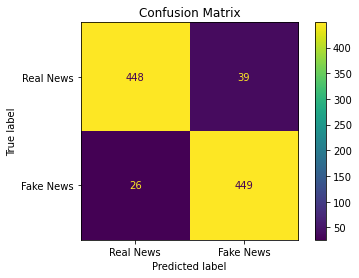

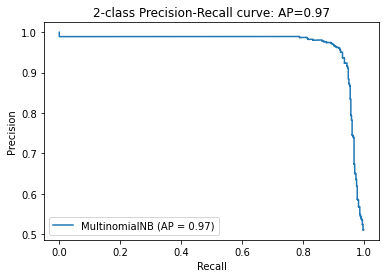





In [69]:
print(f"Accuracy: {classifier.score(X_test, y_test):.2%}")

Accuracy: 93.24%


In [70]:
print(classification_report(y_test, classifier.predict(X_test), target_names=["Real News", "Fake News"])) # Test Set
print(classification_report(y_train, classifier.predict(X_train), target_names=["Real News", "Fake News"])) # Train

              precision    recall  f1-score   support

   Real News       0.95      0.92      0.93       487
   Fake News       0.92      0.95      0.93       475

    accuracy                           0.93       962
   macro avg       0.93      0.93      0.93       962
weighted avg       0.93      0.93      0.93       962

              precision    recall  f1-score   support

   Real News       0.99      0.98      0.99      1116
   Fake News       0.98      0.99      0.99      1128

    accuracy                           0.99      2244
   macro avg       0.99      0.99      0.99      2244
weighted avg       0.99      0.99      0.99      2244



Text(0.5, 1.0, 'Confusion Matrix')

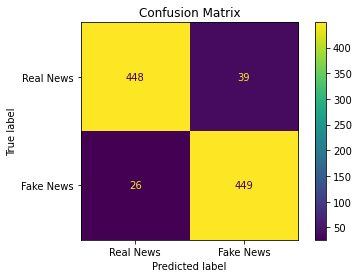

In [71]:
cm = confusion_matrix(y_test, classifier.predict(X_test))

cm_display = ConfusionMatrixDisplay(cm, display_labels=["Real News", "Fake News"],).plot(values_format = '.0f')
plt.title("Confusion Matrix")

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.97')

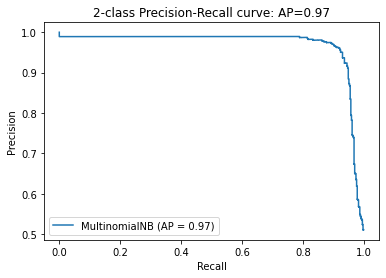

In [73]:
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(0.97))

In [135]:
X_train, X_test, y_train, y_test = train_test_split(all_features, data.label, test_size=0.00001, random_state = 88)
scores = cross_val_score(classifier, X_train, y_train, cv=5)

In [139]:
print("5 Fold Cross-Validated Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

5 Fold Cross-Validated Accuracy: 0.94 (+/- 0.02)
